<a href="https://colab.research.google.com/github/greeningstone/m_ini/blob/master/20_08_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 교차 검증
- 교차 검증의 의미
- 실습

### 방법 1. 홀드아웃
- 데이터: 훈련 데이터와 테스트 데이터
  + 훈련데이터 : 훈련데이터 + 검증데이터 --> 테스트 데이터

### 방법 2. K폴드 교차검증
- 데이터의 수가 적을 때 주로 사용
= Dafault 연산량 X K개 만큼

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#boston  데이타셋 로드
boston =load_boston()

#boston 데이타셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

#boston dataset 의 target arry는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE']=boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()


Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 데이터 시각화를 진행한다

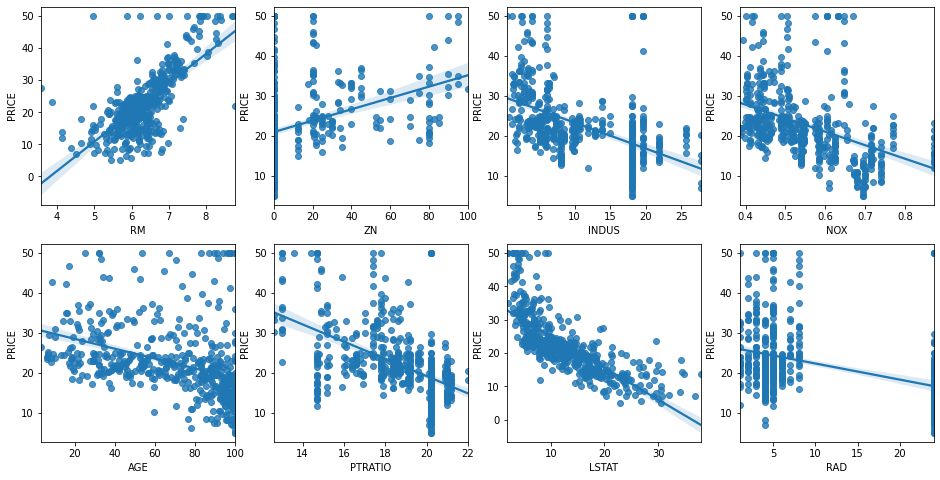

In [11]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE', data=bostonDF , ax=axs[row][col])

### 데이터 탐색
- 시각화, 통계 검정
- 변수정의
CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

MEDV Median value of owner-occupied homes in $1000’s

### 머신러닝 모형 만들기


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# 훈련데이터, 테스트 분리
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# 모형을 만들기 - 선형회귀


# Linear Regression OLS로 학습/예측/평가 수행. 
lr_model = LinearRegression()
lr_model.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

# 예측
y_preds=lr_model.predict(X_test)

- mean_squared_error (MSE) : 실제값과 예측값의 차이를 제곱 후 평균
- RNSE: 실제 오류의 평균보다 더 커지는 특성이 있어서 루트 씌움


In [21]:
mse = mean_squared_error(y_test,y_preds)
print(mse)

17.296915907902008


In [22]:
rmse=np.sqrt(mse)
print(rmse)

4.1589561079556985


### K 폴드 적용
- cross_val_score() 함수 활용해서 RNSE
- +5 폴드값, 값이 

In [24]:
from sklearn.model_selection import cross_val_score

y_target =bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace= False)
lr= LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
print(neg_mse_scores)


[-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]


In [25]:
rmse_score=np.sqrt(-1 *neg_mse_scores)
print(rmse_score)

[3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]


In [26]:
np.mean(rmse_score)

5.828658946215802